In [1]:
# Basic 

import os
import random
import re
import math
import time
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join

# Scikit-learn

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_auc_score

# Deep Learning

from tqdm import tqdm
from tqdm.keras import TqdmCallback
import tensorflow as tf, re, math
import tensorflow.keras.backend as K
from tensorflow.keras.layers import *
import efficientnet.tfkeras as efn
from keras import layers
from keras.applications import DenseNet121
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import Adam

# Visualization

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly
import plotly.express as px
from plotly.tools import FigureFactory as FF
from plotly.offline import iplot
import seaborn as sns
%matplotlib inline

# Misc

import streamlit as st
from PIL import Image
import cufflinks
import cv2 as cv
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [42]:
import pathlib
# Setting file paths for our notebook:

data_dir = r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train_equal'
data_dir = pathlib.Path(data_dir)

In [43]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

1172


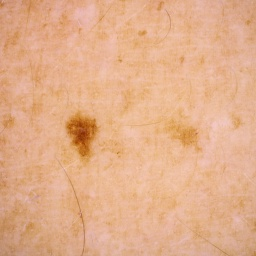

In [44]:
benign = list(data_dir.glob('benign/*'))
PIL.Image.open(str(benign[0]))

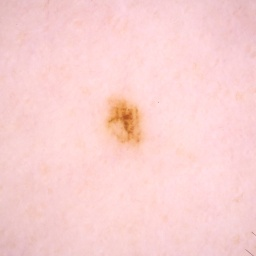

In [45]:
malignant = list(data_dir.glob('malignant/*'))
PIL.Image.open(str(malignant[0]))

In [46]:
batch_size = 32
img_height = 180
img_width = 180

In [47]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1172 files belonging to 2 classes.
Using 938 files for training.


In [48]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1172 files belonging to 2 classes.
Using 234 files for validation.


In [49]:
class_names = train_ds.class_names
print(class_names)

['benign', 'malignant']


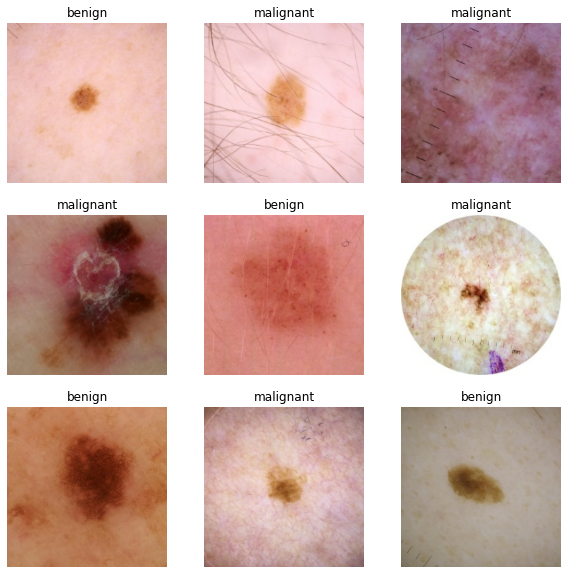

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [51]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [52]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [53]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [54]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.03340934 0.92736393


In [55]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [56]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 22, 22, 64)       

In [58]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
30/30 [==============================] - 14s 454ms/step - loss: 0.8868 - accuracy: 0.5021 - val_loss: 0.6624 - val_accuracy: 0.6496
Epoch 2/10
30/30 [==============================] - 12s 415ms/step - loss: 0.7314 - accuracy: 0.5554 - val_loss: 0.6935 - val_accuracy: 0.6410
Epoch 3/10
30/30 [==============================] - 13s 427ms/step - loss: 0.6802 - accuracy: 0.5608 - val_loss: 0.7405 - val_accuracy: 0.4487
Epoch 4/10
30/30 [==============================] - 12s 399ms/step - loss: 0.6665 - accuracy: 0.6066 - val_loss: 0.6726 - val_accuracy: 0.5726
Epoch 5/10
30/30 [==============================] - 12s 400ms/step - loss: 0.6460 - accuracy: 0.6023 - val_loss: 0.6560 - val_accuracy: 0.6453
Epoch 6/10
30/30 [==============================] - 12s 402ms/step - loss: 0.6235 - accuracy: 0.6695 - val_loss: 0.7057 - val_accuracy: 0.5556
Epoch 7/10
30/30 [==============================] - 12s 404ms/step - loss: 0.6309 - accuracy: 0.6450 - val_loss: 0.6661 - val_accuracy: 0.6453

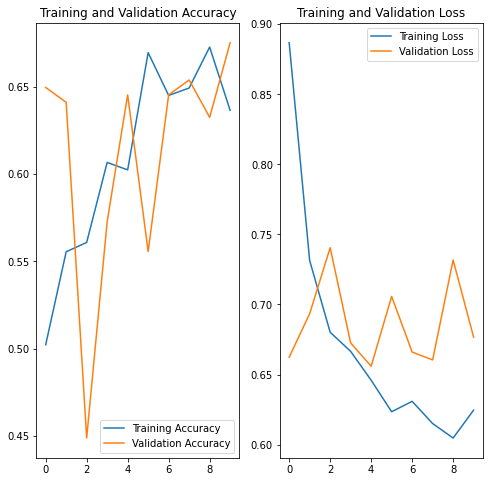

In [59]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [60]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

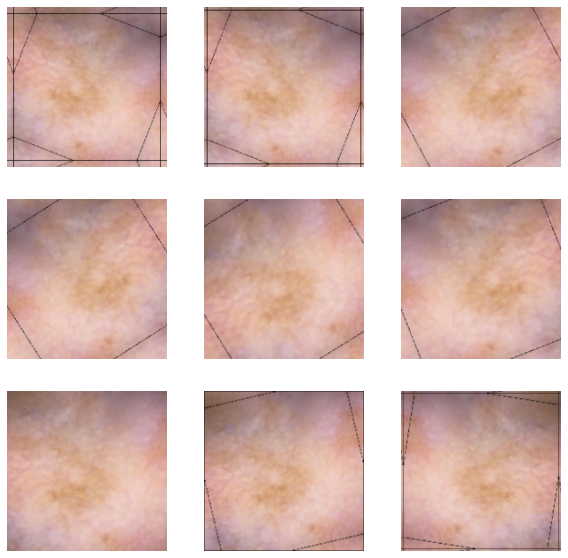

In [61]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [62]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [63]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_5 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 45, 45, 64)       

In [65]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
30/30 [==============================] - 14s 467ms/step - loss: 0.8215 - accuracy: 0.5213 - val_loss: 0.6539 - val_accuracy: 0.6581
Epoch 2/15
30/30 [==============================] - 14s 468ms/step - loss: 0.6718 - accuracy: 0.5874 - val_loss: 0.6461 - val_accuracy: 0.6496
Epoch 3/15
30/30 [==============================] - 14s 469ms/step - loss: 0.6615 - accuracy: 0.6141 - val_loss: 0.6387 - val_accuracy: 0.6410
Epoch 4/15
30/30 [==============================] - 15s 484ms/step - loss: 0.6617 - accuracy: 0.6215 - val_loss: 0.6353 - val_accuracy: 0.6795
Epoch 5/15
30/30 [==============================] - 15s 491ms/step - loss: 0.6516 - accuracy: 0.6354 - val_loss: 0.6339 - val_accuracy: 0.6325
Epoch 6/15
30/30 [==============================] - 15s 485ms/step - loss: 0.6419 - accuracy: 0.6418 - val_loss: 0.6455 - val_accuracy: 0.6667
Epoch 7/15
30/30 [==============================] - 15s 485ms/step - loss: 0.6255 - accuracy: 0.6557 - val_loss: 0.6159 - val_accuracy: 0.6624

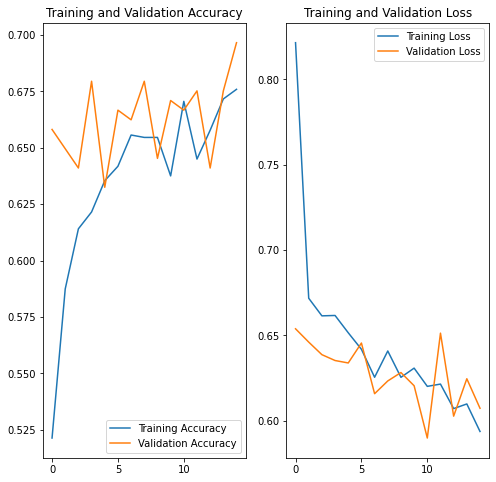

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [67]:
# sunflower_url = r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\test\ISIC_0112420.jpg'
sunflower_path = r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train_class\malignant\ISIC_4523382.jpg'

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to malignant with a 99.94 percent confidence.


In [68]:
tf.keras.models.save_model(model, 'my_model.hdf5')

In [10]:
%%writefile app.py
import streamlit as st
import tensorflow as tf

st.set_option('deprecation.showfileUploaderEncoding', False)
@st.cache(allow_output_mutation=True)
def load_model():
    model = tf.keras.models.load_model('my_model.hdf5')
    return model
model = load_model()
st.write("""
        # Melanoma Classification
""")

file = st.file_uploader("Please upload image file", type=["jpg", "png"])
from PIL import Image, ImageOps
import numpy as np
def import_and_predict(image_data, model):
    size = (180, 180)
    image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
    img = np.asarray(image)
    img_reshape = img[np.newaxis,...]
    prediction = model.predict(img_reshape)
    
    return prediction

if file is None:
    st.text("Please upload image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    score = tf.nn.softmax(predictions[0])
    class_names = ['Benign', 'Malignant']
    string = "This image most likely belongs to {} with a {:.2f}% confidence.".format(class_names[np.argmax(score)], 100 * np.max(score))
    st.success(string)

Overwriting app.py


In [11]:
!ngrok authtoken 1lJlGZQQXEgbwYLo0nblXjSPAls_4bm4H7Xc2LAQuPvwyhAbR

Authtoken saved to configuration file: C:\Users\HIMANSHU/.ngrok2/ngrok.yml


In [12]:
!streamlit run app.py 

^C


In [107]:
# from pyngrok import ngrok
# url = ngrok.connect(port=8501)
# url